# TRAIN MODEL CNN

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
images=[]
classNo=[]
path="dataset"

In [4]:
# Load data
for x in range(0, 2):
    myPicList=os.listdir(path+"/"+str(x))
    for y in myPicList:
        try:
            curImg=cv2.imread(path+"/"+str(x)+"/"+y)
            curImg=cv2.resize(curImg,(32,32))
            images.append(curImg)
            classNo.append(x)
        except Exception as e:
            print(str(e))
    print(x)

images=np.array(images)
classNo=np.array(classNo)


OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.4) D:\a\ope

In [5]:
print(images.shape)
print(classNo.shape)

(5760, 32, 32, 3)
(5760,)


In [6]:
# chia nhỏ dữ liệu
x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=0.2)
print(x_train.shape, " ", y_train.shape, " ", y_test.shape, x_test.shape)

(4608, 32, 32, 3)   (4608,)   (1152,) (1152, 32, 32, 3)


In [7]:
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape," ", type(x_train))

(3686, 32, 32, 3)   <class 'numpy.ndarray'>


In [8]:
# cái này sử dụng để normalize ảnh cho việc train
def preprocessing(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   # img=cv2.equalizeHist(img)
    img=img/255 
    return img

In [9]:
# normalize data
x_train= np.array(list(map(preprocessing, x_train)))
x_test= np.array(list(map(preprocessing, x_test)))
x_validation= np.array(list(map(preprocessing, x_validation)))

In [10]:
# print(x_train.shape[0], " ", x_train.shape[1], " ", x_train.shape[2])

In [11]:
#reshape data
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)

In [12]:
# tạo constructor ImageDataGenerator 
dataGen=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10)

dataGen.fit(x_train)

# convert interger vector into binary array
y_train=to_categorical(y_train, 2)
y_test=to_categorical(y_test, 2)
y_validation=to_categorical(y_validation, 2)



In [13]:
# train model CNN.
# add convolution layer
# add MaxPolling Layer
# add Dropout Layer
def myModel():


    model=Sequential()
    model.add((Conv2D(32, (3,3), input_shape=(32,32,1),activation='relu')))
    model.add((Conv2D(32, (3,3),activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add((Conv2D(64, (3,3),activation='relu')))
    model.add((Conv2D(64, (3,3),activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [14]:

model=myModel()

# train
history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),
                        
    epochs=10,
    validation_data=(x_validation,y_validation),
    shuffle=1)


model.save("MyTrainingModel.h5")

Epoch 1/10
74/74 [==============================] - 7s 89ms/step - loss: 0.6927 - accuracy: 0.5043 - val_loss: 0.6972 - val_accuracy: 0.4501
Epoch 2/10
74/74 [==============================] - 8s 102ms/step - loss: 0.6241 - accuracy: 0.6479 - val_loss: 0.5001 - val_accuracy: 0.7809
Epoch 3/10
74/74 [==============================] - 7s 97ms/step - loss: 0.5142 - accuracy: 0.7591 - val_loss: 0.4201 - val_accuracy: 0.8145
Epoch 4/10
74/74 [==============================] - 7s 101ms/step - loss: 0.4482 - accuracy: 0.7935 - val_loss: 0.3633 - val_accuracy: 0.8395
Epoch 5/10
74/74 [==============================] - 7s 98ms/step - loss: 0.3985 - accuracy: 0.8256 - val_loss: 0.2668 - val_accuracy: 0.8807
Epoch 6/10
74/74 [==============================] - 7s 99ms/step - loss: 0.3181 - accuracy: 0.8684 - val_loss: 0.2400 - val_accuracy: 0.8991
Epoch 7/10
74/74 [==============================] - 7s 99ms/step - loss: 0.2795 - accuracy: 0.8918 - val_loss: 0.2052 - val_accuracy: 0.9197
Epoch 8/10


# VISUALIZE DATA

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
print(epochs_range)

range(0, 10)


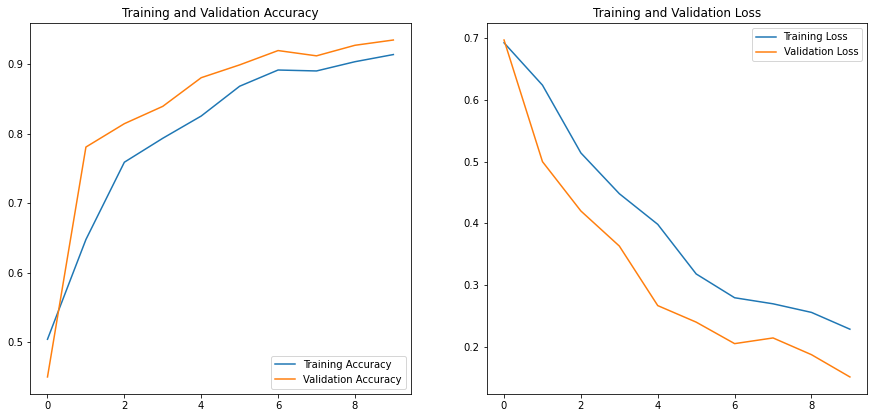

In [17]:


plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()